##Data pre-processing

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv("Position_Salaries.csv")
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [67]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values
y=y.reshape(len(y),1)  # 10 rows and 1 column

In [68]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [69]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


##Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
x_sca = StandardScaler()
y_sca = StandardScaler()
x=x_sca.fit_transform(x)
y=y_sca.fit_transform(y)

In [71]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [72]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [73]:
from sklearn.svm import SVR
regressor=SVR(kernel ='rbf')
regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##Reverse Scaling

In [74]:
y_sca.inverse_transform(regressor.predict(x_sca.transform([[6.5]])).reshape(1,1))

array([[170370.0204065]])

##Visualization

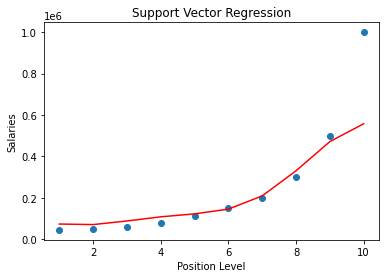

In [75]:
plt.scatter(x_sca.inverse_transform(x),y_sca.inverse_transform(y))
plt.plot(x_sca.inverse_transform(x),y_sca.inverse_transform(regressor.predict(x).reshape(len(y),1)),color='red')
plt.title("Support Vector Regression")
plt.xlabel("Position Level")
plt.ylabel("Salaries")
plt.show()